In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [7]:
data = pd.read_csv("insurance_250_rows.csv")

x = data.drop(columns=["charges"]);
y = data["charges"]

x = pd.get_dummies(x,columns=["region"],drop_first=False,dtype=int)

x["sex"] = x["sex"].map({"female":1,"male":0})
x["smoker"] = x["smoker"].map({"yes":1,"no":0})

x["age_smoker"] = x["age"] * x["smoker"]
x["bmi_smoker"] = x["bmi"] * x["smoker"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\91838\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.396e+07, tolerance: 1.535e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\91838\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.468e+07, tolerance: 1.535e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\91838\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

MSE for alpha=0.001 : 9119664.891196653
MSE for alpha=0.1 : 9120271.247709926
MSE for alpha=1 : 9126161.413814086
MSE for alpha=2 : 9132804.57170015
MSE for alpha=5 : 9145686.80439262
MSE for alpha=10 : 9174450.139554352
MSE for alpha=20 : 9240233.009678356
MSE for alpha=30 : 9317102.39818685
MSE for alpha=40 : 9405026.633462746
MSE for alpha=50 : 9504005.71550593
MSE for alpha=100 : 10164723.827231878


<Axes: >

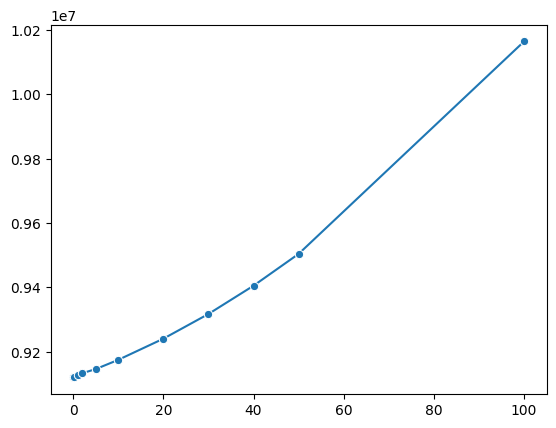

In [13]:
import seaborn as sns

alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
meses = []

for a in alphas:

    lasso_model = Lasso(alpha=a)
    lasso_model.fit(x_train,y_train)
    
    y_pred = lasso_model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    meses.append(mse)
    print(f"MSE for alpha={a} :" , mse)

sns.lineplot(x=alphas,y=meses,marker="o")

In [37]:
from sklearn.linear_model import LassoCV
a = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]

lasso_cv_model = LassoCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42
)

lasso_cv_model.fit(x_train,y_train)

print("best alpha : ", lasso_cv_model.alpha_)

y_pred = lasso_cv_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE : " , mse)

r2 = r2_score(y_test,y_pred)
print("r2 : ", r2)

best alpha :  0.001
MSE :  9119664.891196653
r2 :  0.8627563216591136


C:\Users\91838\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.396e+07, tolerance: 1.535e+06
  model = cd_fast.enet_coordinate_descent(
